In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv("boston house price prediction.csv")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


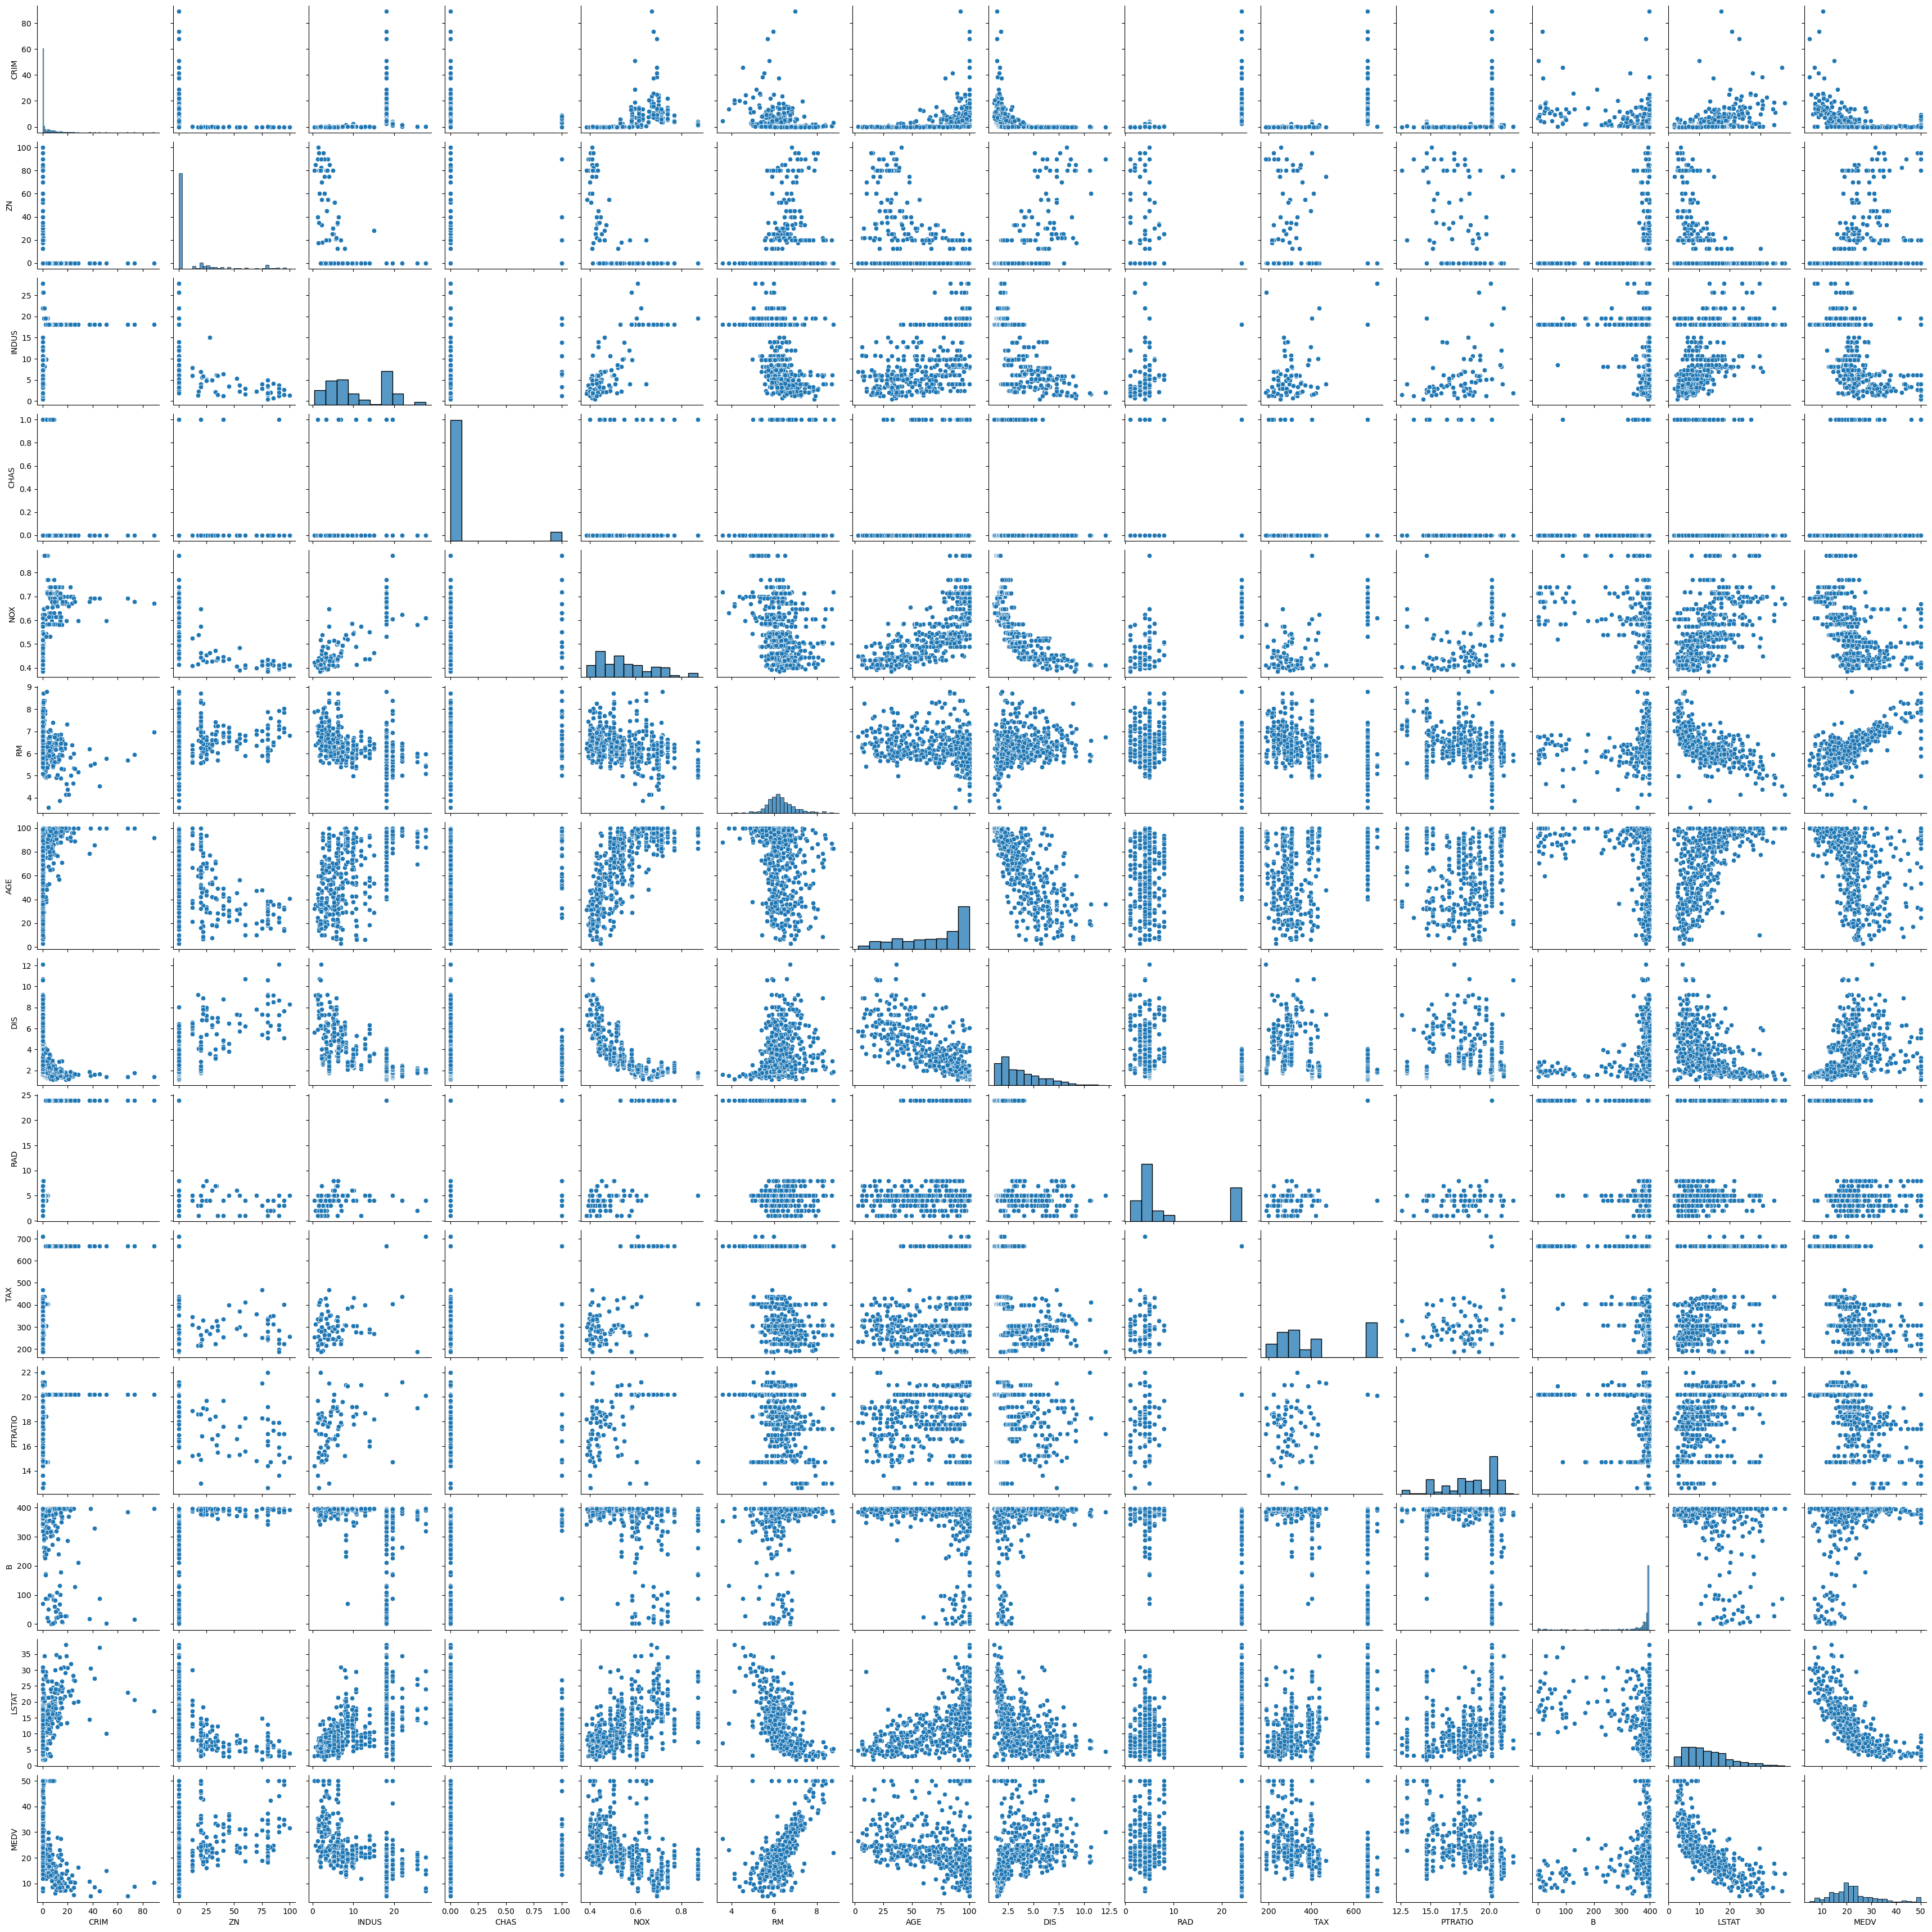

In [8]:
sns.pairplot(df)

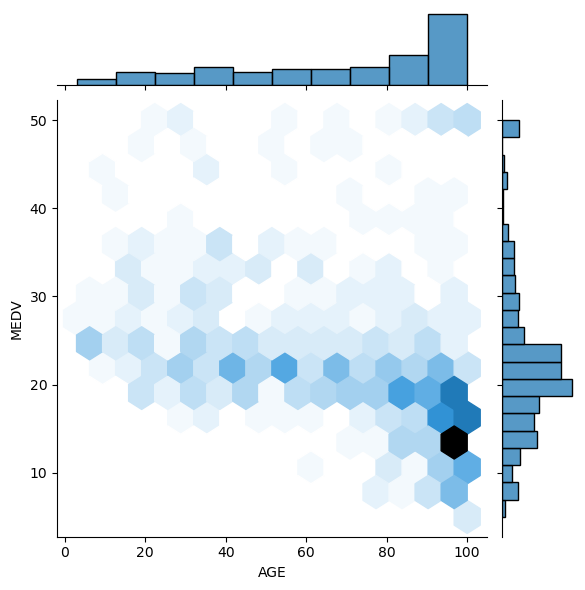

In [9]:
sns.jointplot(x="AGE",y="MEDV",data=df,kind="hex")

In [10]:
df.shape

(506, 14)

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
x = df.drop(["MEDV"],axis=1)
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


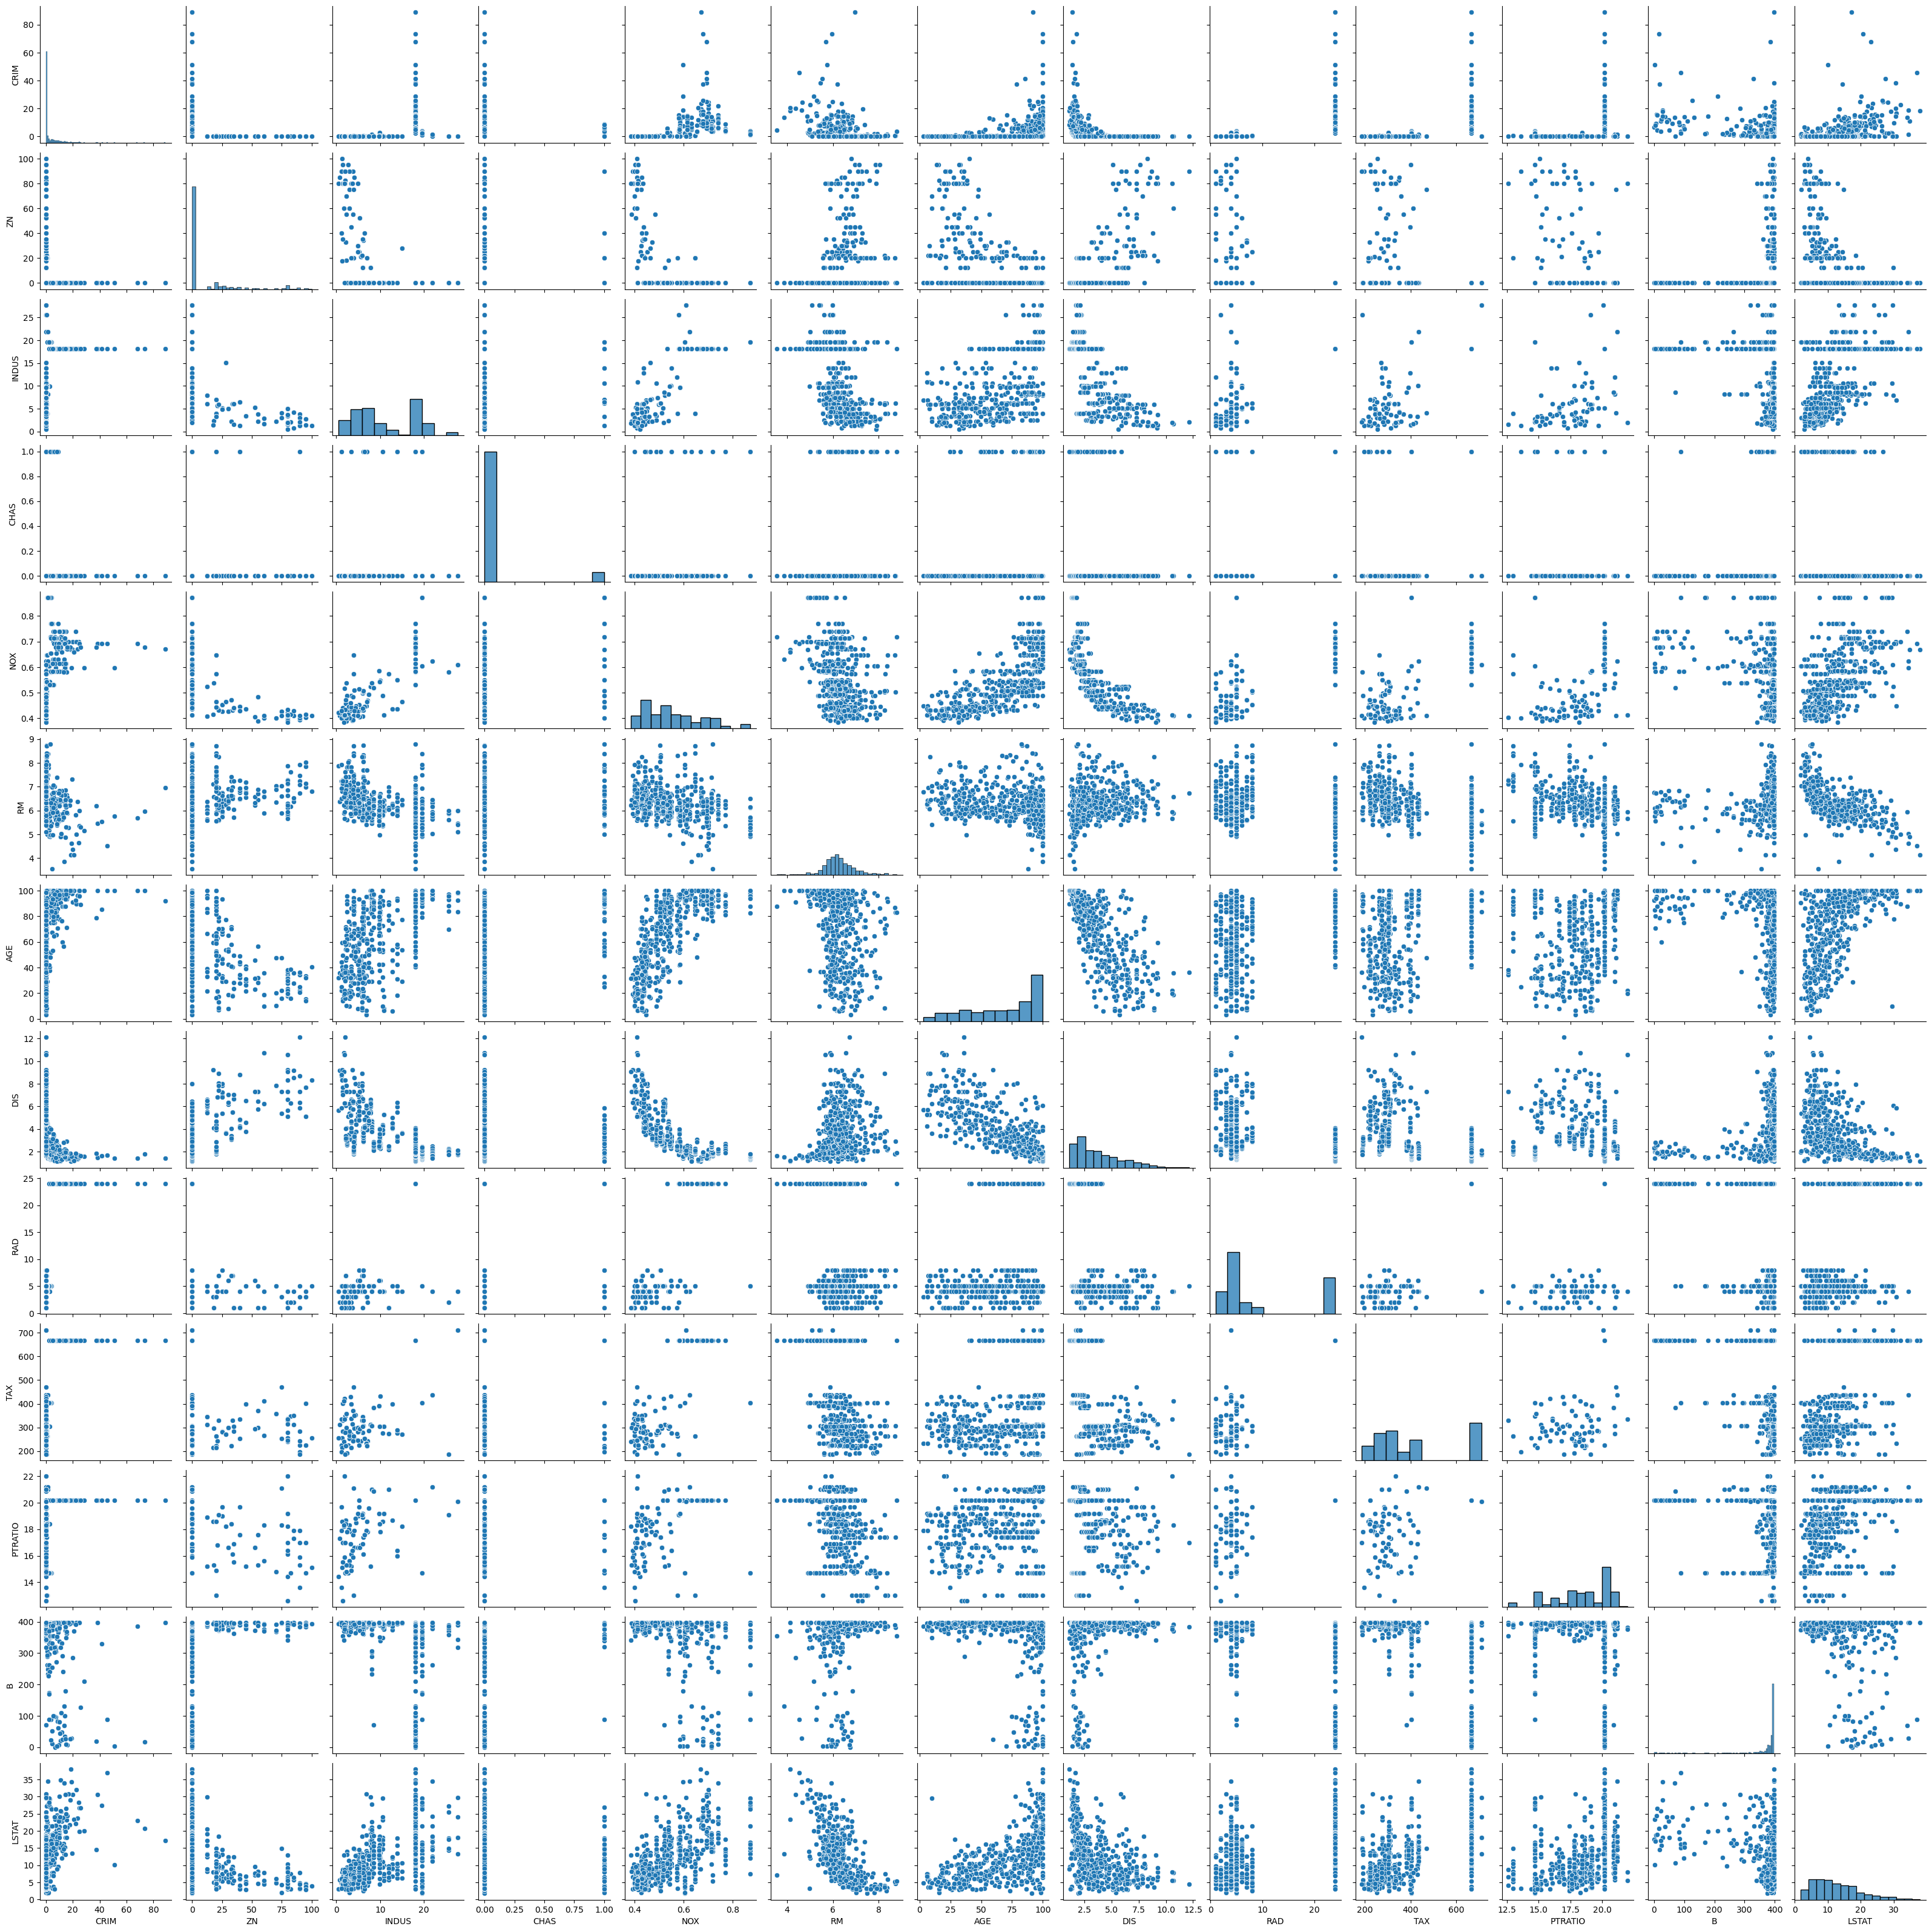

In [14]:
sns.pairplot(x)

In [15]:
y = df["MEDV"]
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

# train test split

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

# prediction

In [19]:
xtest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233.0,17.9,385.41,4.84
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666.0,20.2,350.65,14.19
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293.0,16.6,371.72,9.51
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92


In [20]:
ytest

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
41     26.6
361    19.9
289    24.8
498    21.2
293    23.9
Name: MEDV, Length: 127, dtype: float64

In [21]:
ytrain

502    20.6
172    23.1
80     28.0
46     20.0
318    23.1
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 379, dtype: float64

In [22]:
pred = regressor.predict(xtest)
pred

array([32.37816533, 27.95684437, 18.07213891, 21.63166556, 18.93029508,
       19.96277202, 32.2834674 , 18.06715668, 24.72989076, 26.85359369,
       27.23326816, 28.57021239, 21.18778302, 26.94393815, 23.37892579,
       20.89176865, 17.11746934, 37.73997945, 30.51980066,  8.44489436,
       20.86557977, 16.21989418, 25.13605925, 24.77658813, 31.40497629,
       11.02741407, 13.82097563, 16.80208261, 35.94637198, 14.7155729 ,
       21.23939821, 14.15079469, 42.72492585, 17.83887162, 21.84610225,
       20.40178099, 17.50287927, 27.00093206,  9.80760408, 20.00288662,
       24.27066782, 21.06719021, 29.47089776, 16.48482565, 19.38852695,
       14.54778282, 39.39838319, 18.09810655, 26.22164983, 20.60676525,
       25.09994066, 24.48366723, 25.02297948, 26.84986898,  5.01517985,
       24.12809513, 10.72843392, 26.83178157, 16.8023533 , 35.48142073,
       19.50937911, 27.43260347, 16.58016763, 19.151488  , 10.9990262 ,
       32.05016535, 36.32672849, 21.8596379 , 24.8158357 , 25.32

# R squared value

In [23]:
regressor.score(xtest,ytest)

0.7789410172622879

In [24]:
from sklearn.metrics import r2_score
score = r2_score(ytest,pred)
score

0.7789410172622879